In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import shape
import os
import figformat as ff

In [2]:
import glob
import re
import string
COORD_DIR = 'data'
FILE_FORMAT = '.txt'
# assing setting and ID to each file
meanders = []
for file in ff.log_progress(glob.glob(COORD_DIR+os.sep+"**",recursive=True)):
    md = shape.meander() # initiate meander object
    Checker = re.search(FILE_FORMAT,file) # File format checker (if a file is .txt file)
    if Checker:
        path = file[len(COORD_DIR)+1:-1*len(FILE_FORMAT)] # path name (omitting the separator and the file format)
        if len(path.split(os.sep)) == 3: # in the case of meta folder
            pass # ignore meta info
        else: # here is the files in which coordinates of meanders are stored
            md.setting = path.split(os.sep)[0]
            if path.split(os.sep)[1][0:2] == 's_':
                md.id = ''.join( [i for i in path.split(os.sep)[1].split('_')[1:] if not i.isdigit() ] )
            else:
                md.id = ''.join( [i for i in path.split(os.sep)[1] if not i.isdigit() ] )
            # assing site from file name 
            m = re.search(r"\d",md.id)
            if m:
                md.site = md.id[0:m.start()]
            else:
                md.site = md.id
            # print('id:',md.id)
            # print('setting:',md.setting)
            # print('site:',md.site)
            # print('---------')
            # load coordinates
            centre = pd.read_table(file,header=None)
            md.x = np.array(centre[0])
            md.y = np.array(centre[1])
            md.s = np.array(centre[2])
            md.c = np.array(centre[3])
            meanders.append(md)

In [3]:
df = pd.DataFrame()
df['md'] = [md for md in meanders]
df['id'] = [md.id for md in meanders]
df['setting'] = [md.setting for md in meanders]
df['site'] = [md.site for md in meanders]

In [4]:
from matplotlib import style
style.use('seaborn')
A4 = ff.get_A4size()
EXPORT_DIR = 'Export'
SAVE_DIR = EXPORT_DIR+os.sep+'Figure'+os.sep+'Dataset'
os.makedirs(SAVE_DIR,exist_ok=True)

groups = df.groupby('setting')
for setting,group in ff.log_progress(groups):
    #
    # XY coordinate graph
    #
    fig = plt.figure(figsize=[A4['width'],A4['width']])
    ax = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1, fig = fig)
    ax.set_title(setting)

    total_length = 0
    max_amp = 0
    for md in group['md']:
        total_length += np.abs(np.min(md.x)-np.max(md.x))
        temp_amp = np.abs(np.min(md.y)-np.max(md.y))
        if max_amp < temp_amp:
            max_amp = temp_amp
    row_length = total_length / 5.0

    x_start = 0
    y_start = 0
    temp_length = 0
    margin = 20
    for i,md in enumerate( group['md'] ):
        # temp_length += np.abs( np.min(md.x) - np.max(md.x) )
        if x_start < row_length:
            ax.plot(np.array(md.x)+x_start,np.array(md.y)+y_start,alpha=0.4) # Centerline
            x_start = x_start + np.abs( np.min(md.x) - np.max(md.x) ) + margin
            y_start = y_start
        else:
            ax.plot(np.array(md.x)+x_start,np.array(md.y)+y_start,alpha=0.4) # Centerline
            x_start = 0
            y_start = y_start -max_amp - margin
            temp_length = 0
        
        # ax.text(0.1,i*10,md.id) # Name of file
    plt.tight_layout()
    plt.savefig(SAVE_DIR+os.sep+setting+'.pdf',dpi=300)
    plt.close()

    #
    # SC coordinate graph
    #

    fig = plt.figure(figsize=[A4['width'],A4['width']])
    ax = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1, fig = fig)
    ax.set_title(setting)

    total_length = 0
    max_amp = 0
    for md in group['md']:
        total_length += np.abs(np.min(md.s)-np.max(md.s))
        temp_amp = np.abs(np.min(md.c)-np.max(md.c))
        if max_amp < temp_amp:
            max_amp = temp_amp
    row_length = total_length / 5.0

    s_start = 0
    c_start = 0
    temp_length = 0
    margin = 20
    for i,md in enumerate( group['md'] ):
        # temp_length += np.abs( np.min(md.x) - np.max(md.x) )
        if s_start < row_length:
            ax.plot(np.array(md.s)+s_start,np.array(md.c)+c_start,alpha=0.4) # Centerline
            s_start = s_start + np.abs( np.min(md.s) - np.max(md.s) ) + margin
            c_start = c_start
        else:
            ax.plot(np.array(md.s)+s_start,np.array(md.c)+c_start,alpha=0.4) # Centerline
            s_start = 0
            c_start = c_start -max_amp - margin
            temp_length = 0
        
        # ax.text(0.1,i*10,md.id) # Name of file
    plt.tight_layout()
    plt.savefig(SAVE_DIR+os.sep+setting+'_sc.pdf',dpi=300)
    plt.close()



/tmp/ipykernel_232150/2291048141.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


In [5]:
import seaborn as sns
SAVE_DIR = EXPORT_DIR+os.sep+'Figure'
os.makedirs(SAVE_DIR,exist_ok=True)
# determine the radius of ellipse
for md in df['md']:
    md.streatch = np.abs( md.x[0]-md.x[-1] )
radii = [np.abs( md.x[0]-md.x[-1] )/(2*np.pi) for md in meanders ]
streatch = [md.streatch for md in meanders ]

radius = np.percentile(radii,10)

df['radii'] = radii
df['streatch'] = streatch
print(df.iloc[:,1:])

#- DataFrame ---------- 
DATA = df.iloc[:,1:]
#- Axes Setting ---------- 
fig = plt.figure(figsize=[A4['width'],A4['half']])
ax = plt.subplot2grid((1,2),(0,1),rowspan=1,colspan=1,fig=fig)
bx = plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1,fig=fig)
ax.set_xlabel( "radii")
ax.set_ylabel( "Frequency" )
bx.set_xlabel( "Streamwise length")
bx.set_ylabel( "Frequency" )
ax.set_xlim(min(DATA['radii'].replace([np.inf, -np.inf], np.nan ).dropna() ) - abs( min(DATA['radii'].replace([np.inf, -np.inf], np.nan ).dropna() )/10), max(DATA['radii'].replace([np.inf, -np.inf], np.nan).dropna()) + abs(max(DATA['radii'].replace([np.inf, -np.inf], np.nan).dropna())/10)  )
#- PLOT ------------------ 
sns.histplot(DATA.replace([np.inf, -np.inf], np.nan).dropna(),x='radii',stat='probability', bins = 16, log_scale=True, element='step',legend=True ,ax = ax)
sns.histplot(DATA.replace([np.inf, -np.inf], np.nan).dropna(),x='streatch',stat='probability', bins = 16, log_scale=True, element='step',legend=True ,ax = bx)
plt.tight_layout()
plt.savefig(SAVE_DIR+os.sep+'hist_width_all.pdf',dpi =300)
plt.close()    

                        id            setting                   site  \
0                     mk02      Meanderkarren                     mk   
1                     mk01      Meanderkarren                     mk   
2     RepublicanBenkleman1     Alluvial_NCHRP    RepublicanBenkleman   
3                   White1     Alluvial_NCHRP                  White   
4                  Carson3     Alluvial_NCHRP                 Carson   
..                     ...                ...                    ...   
336  Kangerlussuag_meander  MeltwaterChannels  Kangerlussuag_meander   
337           Root_meander  MeltwaterChannels           Root_meander   
338       Waldemar_meander  MeltwaterChannels       Waldemar_meander   
339     Jakobshavn_meander  MeltwaterChannels     Jakobshavn_meander   
340       Waldemar_meander  MeltwaterChannels       Waldemar_meander   

          radii  streatch  
0     15.841169    99.533  
1     10.217111    64.196  
2     10.155995    63.812  
3     17.688480   111.1

In [6]:
delt = 0.001
T = 1
ratio = 1
for md in ff.log_progress(df['md']):
    xp,yp = shape.coord_time(md.x,md.y,delt,T)
    xpr = xp*ratio
    radius = np.abs(xpr[0] - xpr[-1])/(2*np.pi)
    theta = xpr/radius
    rt = yp + radius
    xp,yp = shape.coord_time(rt*np.cos(theta),rt*np.sin(theta),delt,T)
    md.xp = xp
    md.yp = yp
    


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1001,)

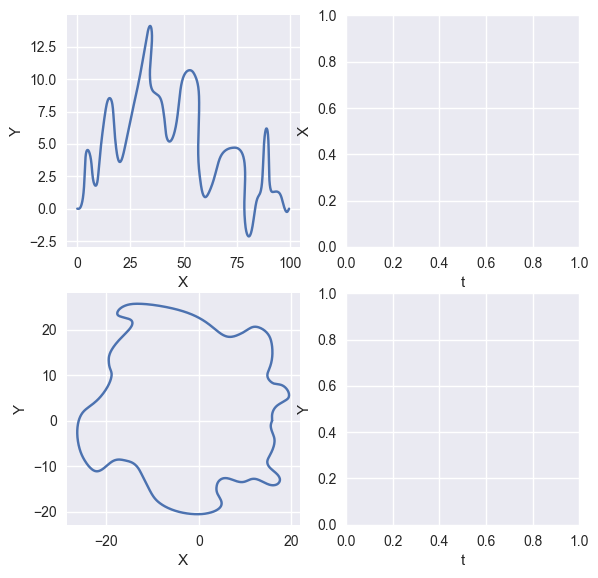

In [7]:
SAVE_DIR = EXPORT_DIR+os.sep+'Figure'+os.sep+'Periodic'
os.makedirs(SAVE_DIR,exist_ok=True)
for md in ff.log_progress(df['md']):
    fig = plt.figure(figsize=[A4['width'],A4['width']])
    ax = plt.subplot2grid((2,2), (0,0), rowspan=1, colspan=1, fig = fig)
    bx = plt.subplot2grid((2,2), (1,0), rowspan=1, colspan=1, fig = fig)
    cx = plt.subplot2grid((2,2), (0,1), rowspan=1, colspan=1, fig = fig)
    dx = plt.subplot2grid((2,2), (1,1), rowspan=1, colspan=1, fig = fig)
    ax.set_xlabel('X'); ax.set_ylabel('Y');
    bx.set_xlabel('X'); bx.set_ylabel('Y');
    cx.set_xlabel('t'); cx.set_ylabel('X');
    dx.set_xlabel('t'); dx.set_ylabel('Y');
    ax.plot(md.x,md.y)
    bx.plot(md.xp,md.yp)
    cx.plot(np.arange(0,T,delt),md.xp)
    dx.plot(np.arange(0,T,delt),md.yp)
    plt.tight_layout()
    plt.savefig(SAVE_DIR+os.sep+str(md.id)+'_periodic.pdf',dpi = 300)
    # plt.show()
    plt.close()


In [7]:
# Large data set analysis (streatch > 80)
df_target = df.loc[df['streatch'] > 80]
df_target = df_target.loc[df_target['setting'] != 'MeltwaterChannels']
print(len(df_target['md']))
groups = df_target.groupby('setting')
for setting, group in groups:
    print(setting, len(group['md']))


for md in ff.log_progress(df_target['md']):    
    md.slices = shape.splitmeander(md,window=50)     

117
Alluvial_NCHRP 87
Meanderkarren 1
Submarinefan 16
mmIce 13


In [8]:
SAVE_DIR = EXPORT_DIR+os.sep+'Figure'+os.sep+'LargeSizeAnalysis'+os.sep+'Slice'
os.makedirs(SAVE_DIR,exist_ok=True)
for md in ff.log_progress(df_target['md']):
    fig = plt.figure(figsize=[A4['width'],A4['half']])
    ax = plt.subplot2grid((2,1),(0,0),rowspan=1,colspan=1,fig=fig)
    bx = plt.subplot2grid((2,1),(1,0),rowspan=1,colspan=1,fig=fig)
    ax.set_title(md.id)
    ax.plot(md.x,md.y)
    for md_temp in md.slices:
        bx.plot(md_temp.x+md_temp.start[0],md_temp.y+md_temp.start[1],alpha=0.5)
    plt.tight_layout()
    plt.savefig(SAVE_DIR+os.sep+str(md.id)+'_slices.pdf',dpi=300)
    plt.close()


In [9]:
md_slices = []
for md in ff.log_progress(df_target['md']):
    for slice in md.slices:        
        md_slices.append(slice)

In [10]:
# Fourier transform (EFDs)
for md in ff.log_progress(md_slices):
    md.xp, md.yp = shape.ellipseCoord(md.x,md.y) # ellipse
    md.N_list, md.efd_list, md.xpf, md.ypf, md.t = shape.fourierApproximation(md.xp,md.yp,30)


In [ ]:
# CHECK if FFT works correctly
SAVE_DIR = EXPORT_DIR+os.sep+'Figure'+os.sep+'LargeSizeAnalysis'+os.sep+'FT'
os.makedirs(SAVE_DIR,exist_ok=True)
for md in ff.log_progress(md_slices):
    fig = plt.figure(figsize=[A4['width'],A4['half']])
    ax = plt.subplot2grid((2,1),(0,0),rowspan=1,colspan=1,fig=fig)
    bx = plt.subplot2grid((2,1),(1,0),rowspan=1,colspan=1,fig=fig)
    ax.set_title(md.id)
    ax.set_ylabel('X')
    bx.set_ylabel('Y')
    bx.set_xlabel('t')
    ax.plot(md.t,md.xp,color='black',alpha=0.7)
    ax.plot(md.t,md.xpf,color='red',alpha=0.7)
    bx.plot(md.t,md.yp,color='black',alpha=0.7)
    bx.plot(md.t,md.ypf,color='red',alpha=0.7)
    plt.tight_layout()
    plt.savefig(SAVE_DIR+os.sep+str(md.id)+'_FT.pdf',dpi=300)
    plt.close()


In [11]:
# Calc FPS
for md in ff.log_progress(md_slices):
    md.FPS_list = shape.FPS_fromEFDs(md.efd_list)

In [73]:
# create a DataFrame object for visualisation
N = 30
df_fps = pd.DataFrame()
df_fps['md'] = [md for md in md_slices]
df_fps['id'] = [md.id for md in md_slices]
df_fps['setting'] = [md.setting for md in md_slices]
df_fps['site'] = [md.site for md in md_slices]
for i in range(N):
    df_fps['FPS'+str(i+1)] = [md.FPS_list[i] for md in md_slices]

FPS_loc = df_fps.columns.get_loc('FPS1') # detect the column where FPS starts

# Histgram of each FPS 
hist_folda = EXPORT_DIR+os.sep+'Figure'+os.sep+'LargeSizeAnalysis'+os.sep+'FPS'+os.sep+'hist' # Folda name for histgram
os.makedirs(hist_folda,exist_ok=True)
for i in range(N):
    plt.hist(df_fps.iloc[:,(FPS_loc+i)])
    plt.savefig(hist_folda+os.sep+'N='+str(i+1)+'.pdf')
    plt.close()

# Histogram of each log FPS
os.makedirs(hist_folda+'_log',exist_ok=True)
df_fps.iloc[:,( FPS_loc  ): (FPS_loc + N )] = -1*np.log(df_fps.iloc[:,( FPS_loc ):(FPS_loc + N )])
for i in range(N):
    plt.hist(df_fps.iloc[:,(FPS_loc+i)])
    plt.savefig(hist_folda+'_log'+os.sep+'N='+str(i+1)+'.pdf')
    plt.close()

In [74]:
SAVE_DIR = EXPORT_DIR+os.sep+'Figure'+os.sep+'LargeSizeAnalysis'+os.sep+'FPS'
os.makedirs(SAVE_DIR,exist_ok=True)

groups = df_fps.groupby('setting')
colors = ff.colorlist(4)
count = 0
for setting,group in ff.log_progress(groups):
    fig = plt.figure(figsize=[A4['width'],A4['half']])
    ax = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1,fig=fig)
    ax.set_title(setting)
    ax.set_ylabel('FPS')
    ax.set_xlabel('N')
    ax.set_yscale('log')
    c = colors[count]
    for md in group['md']:
        ax.plot(np.arange(1,N+1),md.FPS_list,'-o',alpha=0.3)
    count += 1
    plt.tight_layout()
    plt.savefig(SAVE_DIR+os.sep+setting+'_FPS.pdf',dpi=300)
    plt.close()
    

In [84]:
# PCA
result_df, cont, eigenvalues, csv_rot, scale_mat, center_mat, stdv_array, inv_rot, N = shape.conductPCA_correlation(df_fps,30,True)

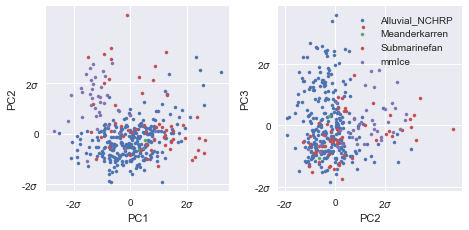

LinAlgError: 2-th leading minor of the array is not positive definite

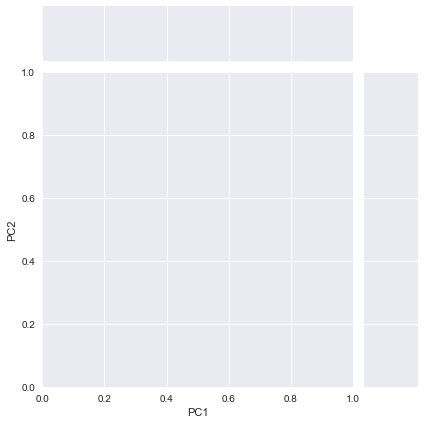

In [86]:
SAVE_DIR = EXPORT_DIR+os.sep+'Figure'+os.sep+'LargeSizeAnalysis'+os.sep+'PCA'
os.makedirs(SAVE_DIR,exist_ok=True)
PCs = np.array([1,2,3,4,5])
sigmas = np.array([-2.0, -1.0, 0.0, 1.0, 2.0])

sigma = stdv_array[0]
sigma2 = stdv_array[1]
sigma3 = stdv_array[2]
sigma4 = stdv_array[3]
sigma5 = stdv_array[4]
sigma6 = stdv_array[5]

fig = plt.figure(figsize=[A4['width'],A4['half']])
ax = plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1,fig=fig)
bx = plt.subplot2grid((1,2),(0,1),rowspan=1,colspan=1,fig=fig)

ax.set_xticks([-2*sigma,0,2*sigma])
ax.set_xticks([-sigma,sigma,3*sigma],minor=True)
ax.set_yticks([-2*sigma2,0,2*sigma2])
ax.set_yticks([-sigma2,sigma2],minor=True)
ax.set_xticklabels( ('-2$\\sigma$', '0',  '2$\\sigma$') )
ax.set_yticklabels( ('-2$\\sigma$', '0',  '2$\\sigma$') )

bx.set_xticks([-2*sigma2,0,2*sigma2])
bx.set_xticks([-sigma2,sigma2,3*sigma2],minor=True)
bx.set_yticks([-2*sigma3,0,2*sigma3])
bx.set_yticks([-sigma3,sigma3],minor=True)
bx.set_xticklabels( ('-2$\\sigma$', '0',  '2$\\sigma$') )
bx.set_yticklabels( ('-2$\\sigma$', '0',  '2$\\sigma$') )

ax.set_xlabel('PC1');ax.set_ylabel('PC2')
bx.set_xlabel('PC2');bx.set_ylabel('PC3')
groups = result_df.groupby('setting')
for setting, group in groups:
    ax.scatter(group['PC1'],group['PC2'],s = 10,label=setting)
    bx.scatter(group['PC2'],group['PC3'],s = 10,label=setting)
    # for pc1, pc2, tex in zip(group['PC1'],group['PC2'],group['id']):
        # ax.text(pc1,pc2,tex)
plt.legend()
plt.tight_layout()
plt.savefig(SAVE_DIR+os.sep+"PCA_setting.pdf",dpi=300)
plt.show()
plt.close()

sns.jointplot(data=result_df , x="PC1", y="PC2",  hue="setting", kind="kde")
plt.show()
plt.close()
sns.jointplot(data=result_df , x="PC2", y="PC3", hue="setting", kind="kde")
plt.show()
plt.close()
sns.jointplot(data=result_df , x="PC1", y="PC3", hue="setting", kind="kde")
plt.show()
plt.close()

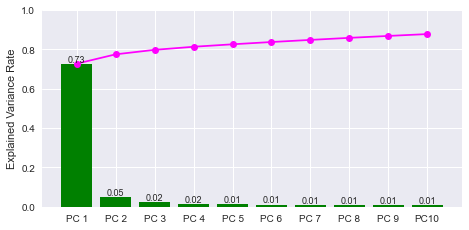

done


In [83]:
### Contribution rate

cont_rate = cont['Cont.']
cont_rate = cont_rate[0:10]
x = ['PC%02s' %i for i in range(1, len(cont_rate)+1)]
y = cont_rate
cum_y = np.cumsum(y)
fig = plt.figure(figsize=(A4['width'],A4['half']))
ax = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1, fig=fig)
ax.bar(x, y, align="center", color="green")
ax.plot(x, cum_y, color="magenta", marker="o")
for i, j in zip(x, y):
    ax.text(i, j, '%.2f' % j, ha='center', va='bottom', fontsize=9)
ax.set_ylim([0,1])
ax.set_ylabel('Explained Variance Rate')
# ax.tickparams(labelsize = 10)
plt.tight_layout()
# plt.grid()
plt.savefig(SAVE_DIR+os.sep+"Contribution_sim.pdf",dpi=300)
plt.show()
plt.close()
print('done')

15


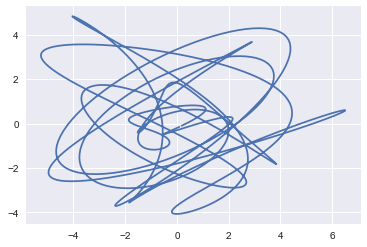

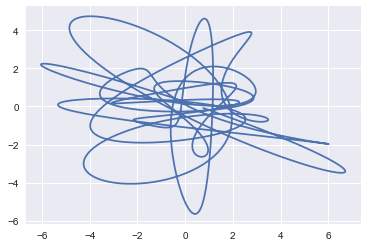

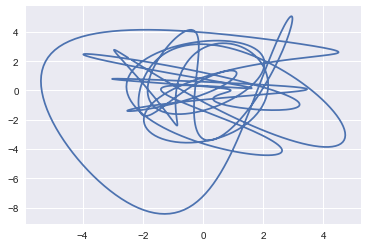

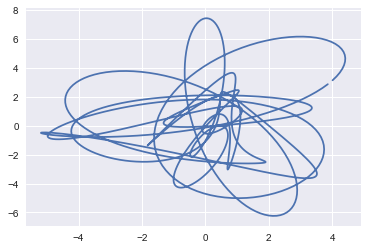

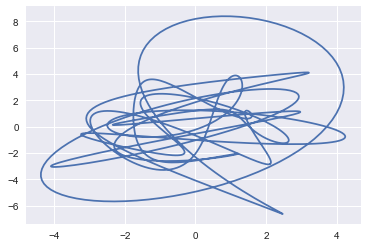

In [72]:
# Reconstruction
SAVE_DIR = EXPORT_DIR+os.sep+'Figure'+os.sep+'LargeSizeAnalysis'+os.sep+'reconst'
os.makedirs(SAVE_DIR, exist_ok=True)

# PLOT
legend_list = []
interval = 10
ylim = [-15,15]

num = 5 # num of reconstruction in each figure
pc_array = np.zeros(N)
pc_array[0] = 0*sigma 
pc_array[1] = 0*sigma2
pc_array[2] = 0*sigma3
T = 1.0
t = np.arange(0,T,0.001)
xmax = 50
N_fps = N
print(N)
for i in range(num):
    fps = shape.fps(pc_array,inv_rot,scale_mat,center_mat) # fps[0] = xmax
    x_r,y_r, efd_list = shape.reconstContourCoord(N_fps,fps)
    plt.plot(x_r,y_r)
#     theta = np.array([np.arctan2(y,x)  for (y,x) in zip(y_r,x_r)])
#     for j,var in enumerate(theta):
#         if var < 0:
#             theta[j] = 2*np.pi + var
#     x_r = theta * radius
#     y_c = np.array( [ np.sqrt(x**2 + y**2)-radius for (x,y) in zip(x_r,y_r) ]  )
#     pl, = plt.plot(x_c,y_c,c='black',alpha=0.2,label='ave')
# legend_list.append(pl)
    plt.show()
    plt.close()
# pc_array[0] = 2*sigma
# pc_array[1] = 0*sigma2
# pc_array[2] = 0*sigma2
# for i in range(num):
#     fps = shape.fps(pc_array,inv_rot,scale_mat,center_mat) # fps[0] = xmax
#     x_r,y_r, efd_list = shape.reconstContourCoord(N_fps,fps[1:])
#     theta = np.array([np.arctan2(y,x)  for (y,x) in zip(y_r,x_r)])
#     for j,var in enumerate(theta):
#         if var < 0:
#             theta[j] = 2*np.pi + var
#     x_r = theta * radius
#     y_c = np.array( [ np.sqrt(x**2 + y**2)-radius for (x,y) in zip(x_r,y_r) ]  )
#     pl, = plt.plot(x_c,y_c,c='black',alpha=0.2,label='ave')
# legend_list.append(pl)


# pc_array[0] = -2*sigma
# pc_array[1] = 0*sigma2
# pc_array[2] = 0*sigma2
# for i in range(num):
#     fps = shape.fps(pc_array,inv_rot,scale_mat,center_mat) # fps[0] = xmax
#     x_r,y_r, efd_list = shape.reconstContourCoord(N_fps,fps[1:])
#     theta = np.array([np.arctan2(y,x)  for (y,x) in zip(y_r,x_r)])
#     for j,var in enumerate(theta):
#         if var < 0:
#             theta[j] = 2*np.pi + var
#     x_r = theta * radius
#     y_c = np.array( [ np.sqrt(x**2 + y**2)-radius for (x,y) in zip(x_r,y_r) ]  )
#     pl, = plt.plot(x_c,y_c,c='black',alpha=0.2,label='ave')
# legend_list.append(pl)

# # plt.legend(legend_list,['ave','2sigma','-2sigma'])
# plt.title('PC1 summary')
# # plt.xlabel('s')
# # plt.ylabel('c')
# plt.ylim(ylim)
# plt.savefig(SAVE_DIR+os.sep+'reconst_PC1_summary.pdf')
# plt.close()

In [55]:
print(np.arctan2(-2,-2)*360/(2*np.pi))

-135.0
